# Clean data from scraped reviews
## Import needed dependancies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [16]:
import nltk
import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
#nlp = spacy.load('en_core_web_md')
nlp = spacy.load('en_core_web_md')
wpt = nltk.WordPunctTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [4]:
%matplotlib inline

In [6]:
# Import scraped reviews

In [17]:
# Review from Fertility IQ
df = pd.read_csv('../scrape/scraped_reviews.csv')

The data is scraped as questions and answers. The following code creates a single column for questions and a single column for answers.

In [18]:
df1 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 1','Answer 1']]
df1['Question'] = df1['Question 1']
df1['Answer']   = df1['Answer 1']
df2 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 2','Answer 2']]
df2['Question'] = df2['Question 2']
df2['Answer']   = df2['Answer 2']
df3 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 3','Answer 3']]
df3['Question'] = df3['Question 3']
df3['Answer']   = df3['Answer 3']
df4 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 4','Answer 4']]
df4['Question'] = df4['Question 4']
df4['Answer']   = df4['Answer 4']
df5 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 5','Answer 5']]
df5['Question'] = df5['Question 5']
df5['Answer']   = df5['Answer 5']
df6 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 6','Answer 6']]
df6['Question'] = df6['Question 6']
df6['Answer']   = df6['Answer 6']
df7 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 7','Answer 7']]
df7['Question'] = df7['Question 7']
df7['Answer']   = df7['Answer 7']
df8 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 8','Answer 8']]
df8['Question'] = df8['Question 8']
df8['Answer']   = df8['Answer 8']
df9 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 9','Answer 9']]
df9['Question'] = df9['Question 9']
df9['Answer']   = df9['Answer 9']
df10 = df[['clinic_name','avg_clinic_score','avg_doc_score','success','income','Question 10','Answer 10']]
df10['Question'] = df10['Question 10']
df10['Answer']   = df10['Answer 10']


/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jacobberger/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [19]:
df_qa = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], ignore_index=True)


In [20]:
df_qa = df_qa.drop(['Question 1','Answer 1','Question 2','Answer 2','Question 3','Answer 3','Question 4','Answer 4',
                   'Question 5','Answer 5','Question 6','Answer 6','Question 7','Answer 7','Question 8','Answer 8',
                   'Question 9','Answer 9','Question 10','Answer 10'], axis=1)

In [21]:
# Remove columns
df_qa = df_qa.dropna().reset_index(drop=True)

In [22]:
def replace_q (val):
    if val[:28]=='How was your experience with':
        val = 'Doctor'   # classify under doctor
    elif val[:16] =='During treatment':  # Treated like num or human
        val = "Doctor"   # classify under doctor
    elif val[:16] == "What's one piece":
        val = 'Advice'
    elif val[:40] == "Describe your experience with your nurse":
        val = "Nurse"
    elif val[:42] == "Describe your experience with your nursing":
        val = "Nurse"
    elif val[:29]=="Describe your experience with":
        val = "Clinic"
    elif val[:22] == "Describe the protocols":
        val = "Protocols"
    elif val[:18]== "Describe the costs":
        val = "Cost"
    elif val[:31] == "What specific things went wrong":
        val = "Problems"
    else:
        if "eSET" in val:
            val = "Protocols"
        else:
            val=val
       
    return val

In [23]:
df_qa.Question = df_qa.Question.apply(replace_q)

In [24]:
for i,q in enumerate (df_t.Question.unique()):
    #if type(q)==float:
    print (i, q)

0 Doctor
1 Advice
2 Nurse
3 Clinic
4 Protocols
5 Cost
6 Problems


The Scraped data from Fertility IQ needs special cleaning since it appears as html text. This will help further clean these responses.

In [25]:
def failed_list(text):
    if "<ul" in text:
        text_list = text.split(">")
        fail_list =[]
        for i in text_list:
            if "</li" in i:
                fail_list.append(i.split('<')[0])
        doc = ', '.join(fail_list)
        return doc
    
    else:
        return text

In [26]:
df_t.Answer = df_t.Answer.apply(failed_list)

In [27]:
#Save partially clean reviews to csv
df_t.to_csv('fiq_reviews.csv')

# Clean Text
## 1) Punctuation
## 2) Contractions
## 3) Stop Words
## 4) Lemetaziation

In [257]:
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
en_stop = set(nltk.corpus.stopwords.words('english'))
wpt = nltk.WordPunctTokenizer()
#wt = nltk.word_tokenizer()
#list of words to not remove
remove_form_stop_words = ['no','not',"aren't","couldn't","didn't","doesn't",
                          "wasn't","wouldn't","won't","don't","isn't","shouldn't"]
for w in remove_form_stop_words:
    en_stop.remove(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacobberger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jacobberger/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [94]:
contractions = { 
"aren't": "are not,
"can't": "cannot",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"isn't": "is not",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"wasn't": "was not",
"weren't": "were not",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not"
}

In [266]:
def simple_clean_document(doc):
    # lower case and remove special characters\whitespaces
    #doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    punc_list = ['.',',',"!",'*','?','-','/','"','(',')','#']
    
    doc = doc.lower()
    doc = doc.strip()
    
    doc = doc.split(" ")
    # Contractions in text 
    new_doc=[]
    for token in doc:
        if token in contractions:
            new_doc.append(contractions[token])
        else:
            new_doc.append(token)
    doc = ' '.join(new_doc)
    
    # tokenize document
    tokens = wpt.tokenize(doc)
    
    tokens = [token for token in tokens]
    # Contractions in text    
    for token in tokens:
        if token in contractions:
            token = contractions[token]
            
    # Remove Punctuation
    tokens = [token for token in tokens if token.strip() not in punc_list]
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in en_stop]
    
    #Lemmatize tokens
    lemm_tokens = [get_lemma(token) for token in filtered_tokens]
    
    # re-create document from filtered tokens
    doc = ' '.join(lemm_tokens)
    return doc

In [267]:
df_t['Clean_Text'] = df_t.Answer.apply(simple_clean_document)

In [268]:
df_t.to_csv('fiq_clean_text.csv')

In [196]:
# OLD TEXT CLEANING PROCESS
#def preprocessor(text):
#    if type(text) == str:
#        text = re.sub('<[^>]*>', '', text)
#        text = re.sub('[\W]+', '', text.lower())
#    return text



#def spacy_clean_text(review):
                 
#    nlp = English()
#    tokenizer = nlp.Defaults.create_tokenizer(nlp)
#    tokens = tokenizer(review)
    
#    lemma_list = []
#    n=0
#    for token in tokens:
#        if token.is_stop is False:
#            token_preprocessed = preprocessor(token.lemma_)
#            if token_preprocessed != '':
#                lemma_list.append(token_preprocessed)
#    text = ' '.join(lemma_list)           
#    #return (lemma_list)
#    return(text)

In [139]:
from sklearn.model_selection import train_test_split

In [269]:
msg_train, msg_test, label_train, label_test = train_test_split(df_t.Clean_Text, df_t.Question, test_size=0.3)

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

In [143]:
vec = CountVectorizer()

In [117]:
data_vsc = vec.fit_transform(data.clean_text)


In [145]:
from sklearn.feature_extraction.text import TfidfTransformer

In [124]:
tfidf_transformer = TfidfTransformer().fit_transform(data_bow)

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [148]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [149]:
predictions = pipeline.predict(msg_test)

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

In [211]:
print(confusion_matrix(label_test,predictions))
print('\n')
print(classification_report(label_test,predictions))

[[ 132    0    0   46  367    0    1    0]
 [   0  434    0   25   21    0    4    0]
 [   1    2  123    2  107    0    9    0]
 [   0    1    0  820  187    0    1    0]
 [   0    0    0   60 1100    1    6    0]
 [   0    0    0  131  164   11    0    0]
 [   1    4    0    1   97    0  361    0]
 [   0    0    0    0    0    0    0  175]]


                                   precision    recall  f1-score   support

  advice give prospective patient       0.99      0.24      0.39       546
                             cost       0.98      0.90      0.94       484
eSET vs. multiple embryo transfer       1.00      0.50      0.67       244
           experience with clinic       0.76      0.81      0.78      1009
           experience with doctor       0.54      0.94      0.69      1167
            experience with nurse       0.92      0.04      0.07       306
            protocols and success       0.95      0.78      0.85       464
       specific things went wrong       1.00      1.

In [151]:
print(confusion_matrix(label_test,predictions))
print('\n')
print(classification_report(label_test,predictions))

[[ 113   57    0  365    1    0    1]
 [   1  816    0  155    0    0    4]
 [   0   16  426   20    0    0    7]
 [   1   68    0 1123    0    0   16]
 [   0  131    0  192   11    0    0]
 [   0    0    0    0    0  173    0]
 [   0    7    5  118    0    0  622]]


              precision    recall  f1-score   support

      Advice       0.98      0.21      0.35       537
      Clinic       0.75      0.84      0.79       976
        Cost       0.99      0.91      0.95       469
      Doctor       0.57      0.93      0.71      1208
       Nurse       0.92      0.03      0.06       334
    Problems       1.00      1.00      1.00       173
   Protocols       0.96      0.83      0.89       752

    accuracy                           0.74      4449
   macro avg       0.88      0.68      0.68      4449
weighted avg       0.81      0.74      0.70      4449



In [288]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
SVM = svm.SVC(C=5) # default kernel = ’rbf’
rf = RandomForestClassifier()

In [289]:
pipeline = Pipeline([
    ('vec', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVM),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [290]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('vec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC(C=5))])

In [291]:
predictions = pipeline.predict(msg_test)

In [292]:
print(confusion_matrix(label_test,predictions))
print('\n')
print(classification_report(label_test,predictions))

[[ 421   42    5   90    7    0   12]
 [  28  838    3   77   57    0    7]
 [   5    9  441    2    0    0   15]
 [  32   75    1 1020    9    0   33]
 [  11  103    1   44  163    0    2]
 [   0    0    0    0    0  175    0]
 [  13    3    6   33    0    0  666]]


              precision    recall  f1-score   support

      Advice       0.83      0.73      0.77       577
      Clinic       0.78      0.83      0.81      1010
        Cost       0.96      0.93      0.95       472
      Doctor       0.81      0.87      0.84      1170
       Nurse       0.69      0.50      0.58       324
    Problems       1.00      1.00      1.00       175
   Protocols       0.91      0.92      0.91       721

    accuracy                           0.84      4449
   macro avg       0.85      0.83      0.84      4449
weighted avg       0.84      0.84      0.83      4449



# Clean Yelp Data

In [309]:
df_yelp = pd.read_csv('../scrape/yelp_reviews.csv')

In [310]:
df_yelp.Ratings[0][0]

'5'

In [311]:
for i, rev in enumerate (df_yelp.Reviews):
    char = False
    for n in re.findall(r'[\u4e00-\u9fff]+', rev):
        char = True
        #print(i,n)
    if char:
        df_yelp = df_yelp.drop(i,axis=0)
        char = False

In [312]:
#df_yelp = df_yelp.drop(129,axis=0)
df_yelp.reset_index(inplace=True)


In [313]:
df_yelp = df_yelp.drop(['Unnamed: 0','index'],axis=1)

In [362]:
def split_up_review(df):
    df_final = pd.DataFrame()
    for c in df.Clinic_name.unique():
        
        df_temp = df[df.Clinic_name == c]
        
        ratings = []
        sentences = []
        #id = c + "_" + str(0)
        for i, r in enumerate (df_temp.Reviews):
            list_of_sentences = r.replace("Dr.","Dr").strip().split(".")
             
            sentences = sentences + list_of_sentences
            
            r = []
            for x in range(0, len(list_of_sentences)):
                r.append(df.Ratings[i][0])
            ratings = ratings + r
            #print(len(ratings))
        #print(len(sentences))
            
        df_new = pd.DataFrame(sentences,columns=['Reviews_by_sentence'])
        df_new['Clinic'] = c
        df_new['Ratings'] = ratings
        df_final = pd.concat([df_final,df_new],ignore_index=True)
        
    return df_final

In [364]:
df_y_split = split_up_review(df_yelp)
len(df_test)

6820

In [366]:
for i, r in enumerate (df_y_split.Reviews_by_sentence):
    if len(r) < 11:
        #print (i,r)
        df_y_split.drop(i,axis=0,inplace=True)

In [368]:
len(df_y_split)

5939

In [369]:
df_y_split.reset_index(drop=True,inplace=True)

In [370]:
df_y_split

,Reviews_by_sentence,Clinic,Ratings
0,Columbia University Fertility center is an exc...,Columbia University Fertility,5
1,We were seen by Dr Paula Brady at the Columbi...,Columbia University Fertility,5
2,"She is an excellent doctor, who treats her pa...",Columbia University Fertility,5
3,Dr Brady took care of us and everything worke...,Columbia University Fertility,5
4,The Clinic as a whole is also very good as it ...,Columbia University Fertility,5
...,...,...,...
5934,I'm in the middle of my treatments with them ...,Penn Fertility Care,5
5935,They have also been individualized in their b...,Penn Fertility Care,5
5936,The doctors are all excellent-- we've gotten ...,Penn Fertility Care,5
5937,The nursing staff is the same way,Penn Fertility Care,5


# Add columm for clean yelp data

In [371]:
#df_yelp_split.clean_answers = df_yelp_split.clean_answers.apply(spacy_clean_text)
df_y_split['clean_answers'] = df_y_split.Reviews_by_sentence.apply(simple_clean_document)

In [372]:
df_y_split[['clean_answers','Reviews_by_sentence']].head()

,clean_answers,Reviews_by_sentence
0,columbia university fertility center excellent...,Columbia University Fertility center is an exc...
1,see dr paula brady columbia university clinic,We were seen by Dr Paula Brady at the Columbi...
2,excellent doctor treat patient personal level,"She is an excellent doctor, who treats her pa..."
3,dr brady take care us everything work great us,Dr Brady took care of us and everything worke...
4,clinic whole also good open patient holiday we...,The Clinic as a whole is also very good as it ...


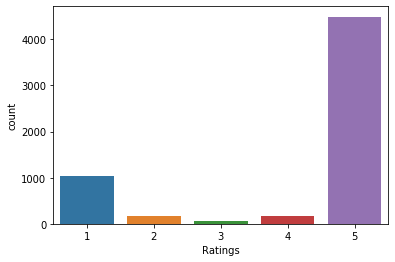

In [374]:
sns.countplot(df_y_split.Ratings)

In [384]:
for i, r in enumerate (df_y_split.clean_answers):
    if len(r) < 2:
        df_y_split.drop(i,axis=0,inplace=True)
        print (i,r)
        #df_yelp_split.drop(i,axis=0,inplace=True)

In [385]:
df_y_split.to_csv('y_clean_reviews.csv')